In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

Loading Dataset

Upload API token

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Dataset -> Copy API command

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats    # downloads data

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 44.6MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]


Extracting zipfile

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')  #opens zipfile
zip_ref.extractall('/content')   #extract contents and store in '/content' directory
zip_ref.close()

Training dataset - 10000 cat images , 10000 dog images


Test dataset - 2500 cat images , 2500 dog images


In [5]:
import tensorflow as tf
from tensorflow import keras

Acessing data from directory

method 1 - use 'os' to acess file

method 2 - use generators to acess images in batches (less space)

In [6]:
#method 2

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',     # takes label from sub folder name
    label_mode = 'int',   # takes label as int type
    batch_size = 32,
    image_size = (228,228),
    shuffle = True
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 16,
    image_size = (228,228),
    shuffle = True
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalizing training data

In [7]:
#data was in the form of array (0-255) -> (0,1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    # image=image/255.0
    print(image, label)
    return image,label

train_ds = train_ds.map(process) #map - takes (image,label) one by one

Tensor("truediv:0", shape=(None, 228, 228, 3), dtype=float32) Tensor("args_1:0", shape=(None,), dtype=int32)


model

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping

In [9]:
callback = EarlyStopping(monitor = 'val_loss',patience=2,min_delta=0.00001,)

In [10]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(228,228,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(228,228,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(228,228,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(228,228,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(32,activation='relu',))
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu',))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 226, 226, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 113, 113, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 831,233 (3.17 MB)

 Trainable params: 831,233 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

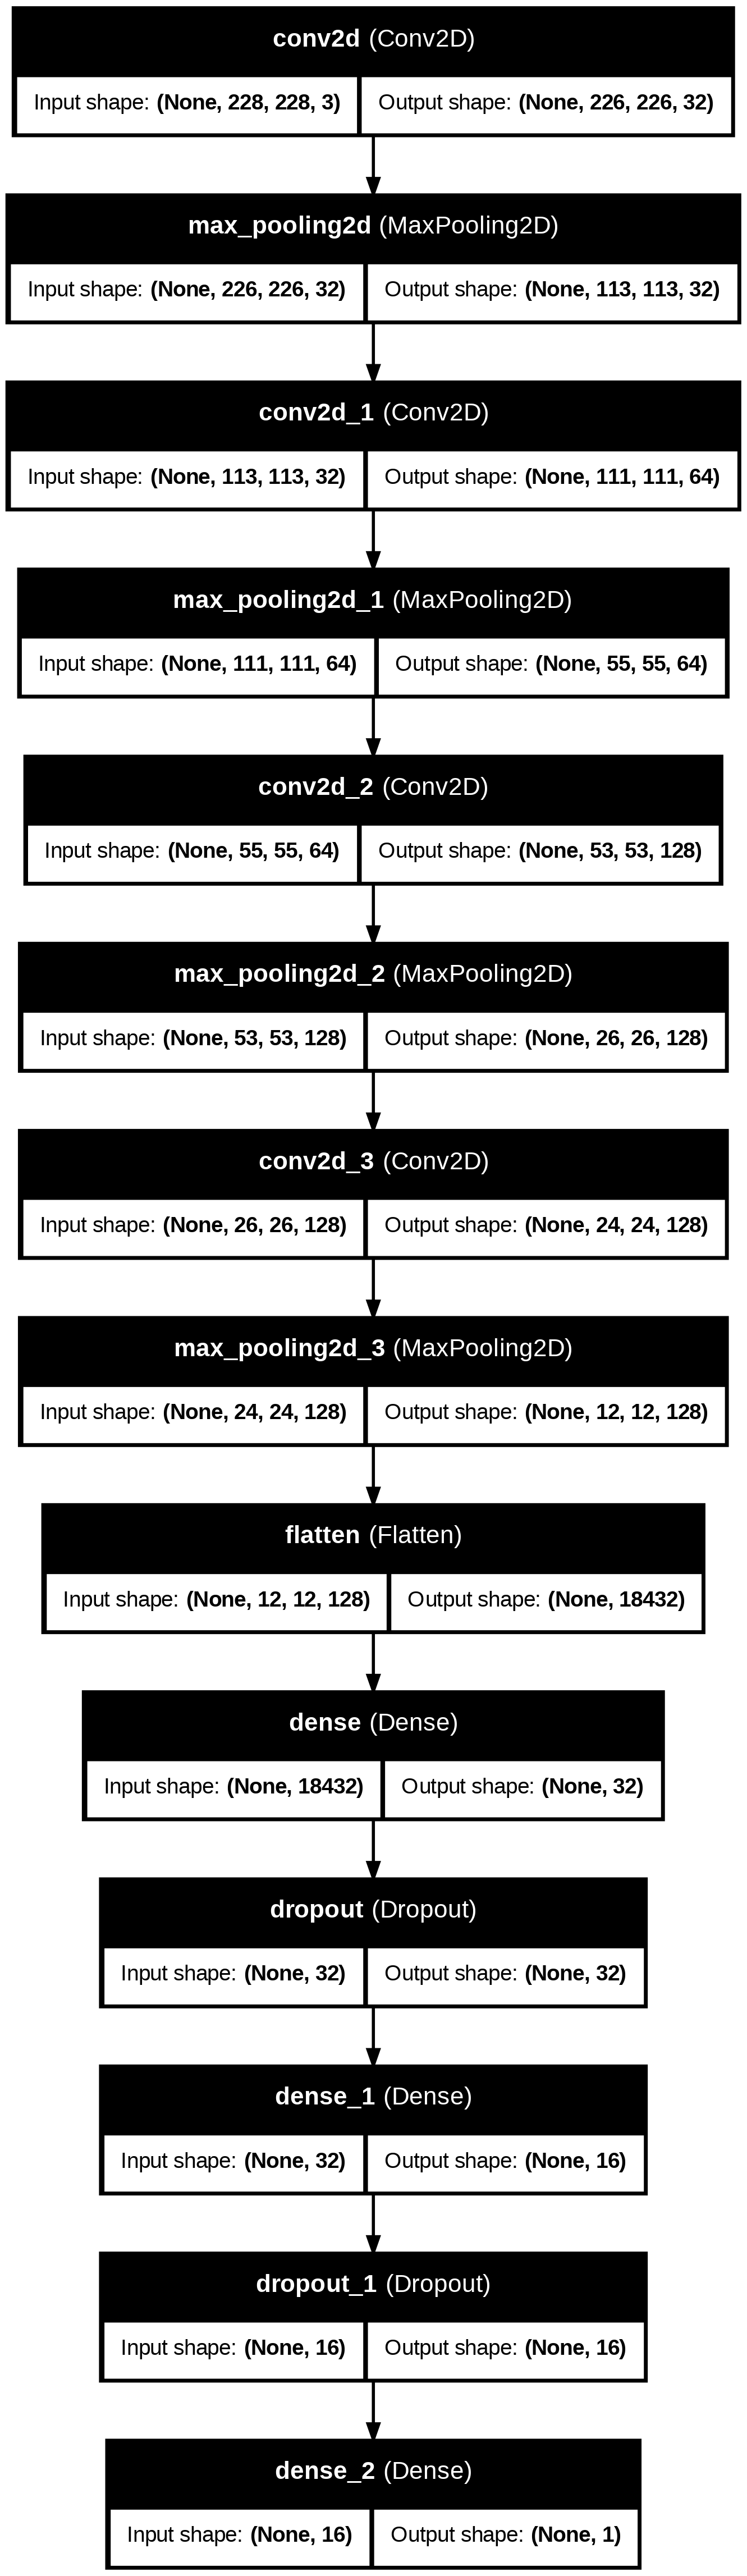

In [12]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_layer_names=True,show_shapes=True)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training model

In [14]:
history = model.fit(train_ds,epochs=25,callbacks=callback,validation_data = test_ds)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5056 - loss: 0.6941 - val_accuracy: 0.5216 - val_loss: 92.9088
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 65ms/step - accuracy: 0.6477 - loss: 0.6281 - val_accuracy: 0.6858 - val_loss: 32.3219
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7664 - loss: 0.4934 - val_accuracy: 0.6626 - val_loss: 44.2852
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8104 - loss: 0.4220 - val_accuracy: 0.7614 - val_loss: 22.5252
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8390 - loss: 0.3681 - val_accuracy: 0.7584 - val_loss: 27.3046
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.8630 - loss: 0.3179 - val_accuracy: 0.7842 - val_loss: 32.4879


In [15]:
import matplotlib.pyplot as plt

Variation of accuracy in each epoch

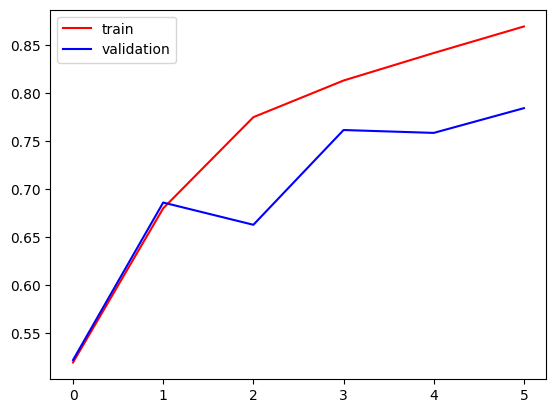

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Variation of loss in each epoch

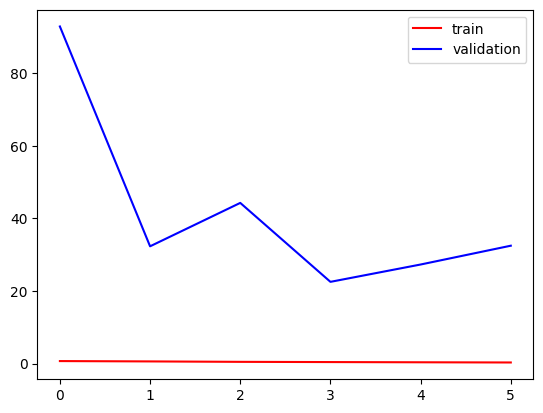

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

Prediction on image

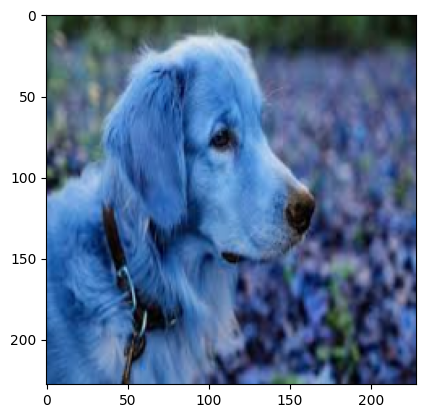

In [46]:
def pre_process(img):
  test_img = cv2.imread(img)
  test_img = cv2.resize(test_img,(228,228))
  plt.imshow(test_img)
  plt.show()
  return test_img

img = "/content/dog3.jpg"
test_img = pre_process(img)

In [47]:
test_input = test_img.reshape((1,228,228,3))

Cat - 0

Dog - 1

In [48]:
model.predict(test_input)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1.0